# PRCP - 1001 - Rice Leaf Disease Detection

In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.

First we will mount our google drive on colab so that we can use the dataset directly from our drive. For this you first need to upload the data on your drive and then mount the drive on colab.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

TF version: 2.11.0
Hub version: 0.12.0


## Importing Required Libraries
Next we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers, etc.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

# importing Open CV library
import cv2
import random
import os
from os import listdir

from PIL import Image
#from sklearn.preprocessing import label_binarize,  LabelBinarizer
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense


import warnings
warnings.filterwarnings('ignore')

## Visualizing the Image Data

### 1. Bacterial Leaf Blight

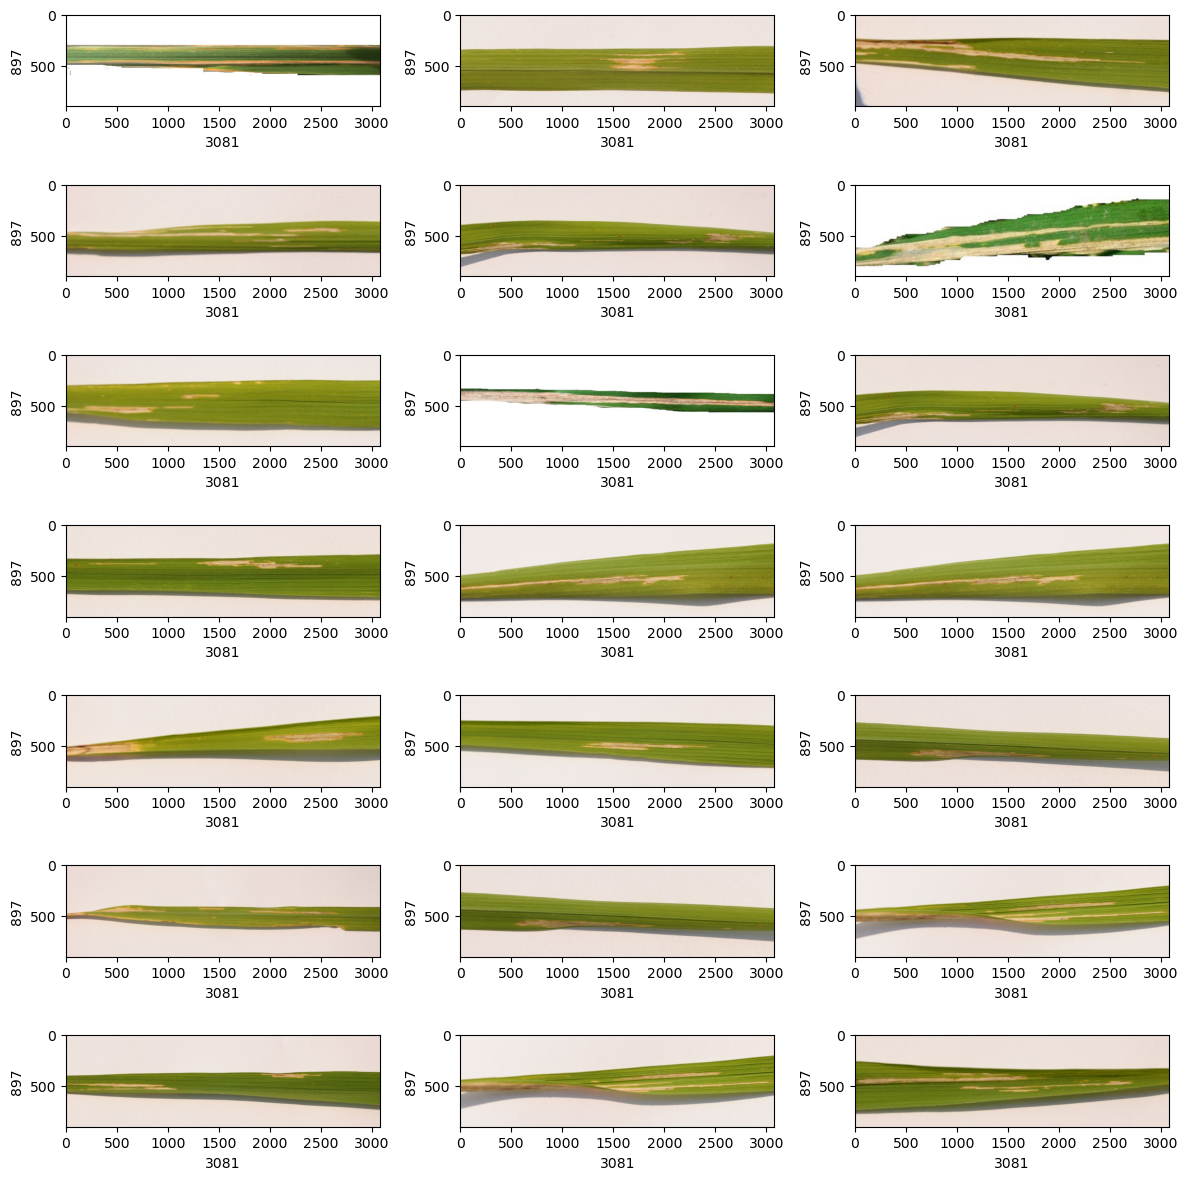

In [3]:

plt.figure(figsize=(12,12))
path = r"C:\Users\vilas\RICE_LEAF_DATA\rice_leaf_diseases_dataset\Bacterial leaf blight"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### 2. Brown Spot Images

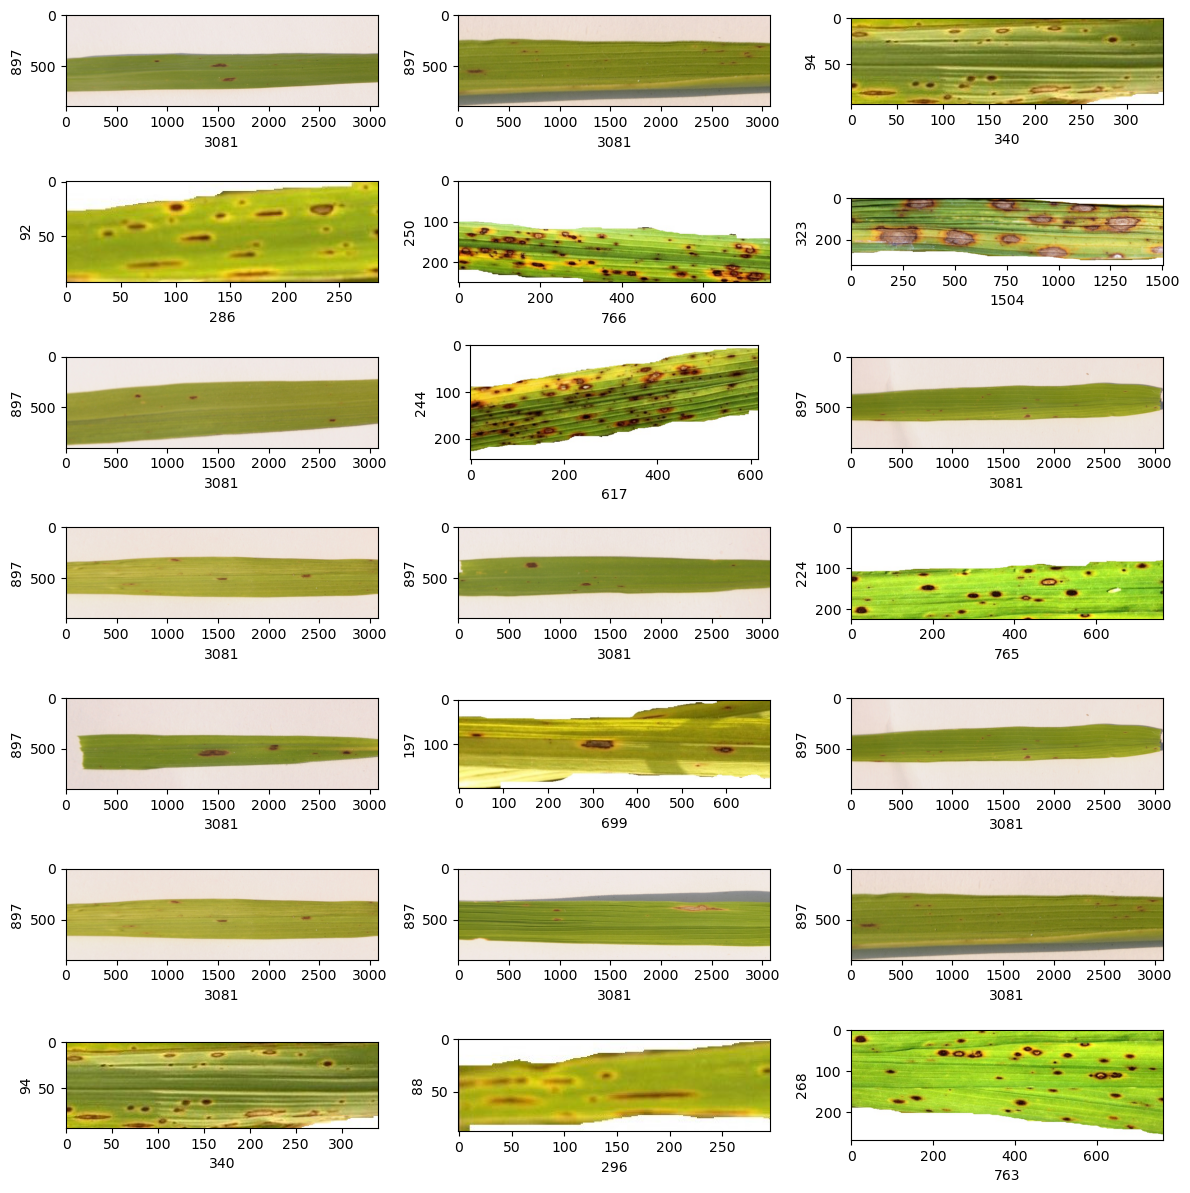

In [4]:
plt.figure(figsize=(12,12))
path =r"C:\Users\vilas\RICE_LEAF_DATA\rice_leaf_diseases_dataset\Brown spot"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image        

### 3. Leaf Smut Images

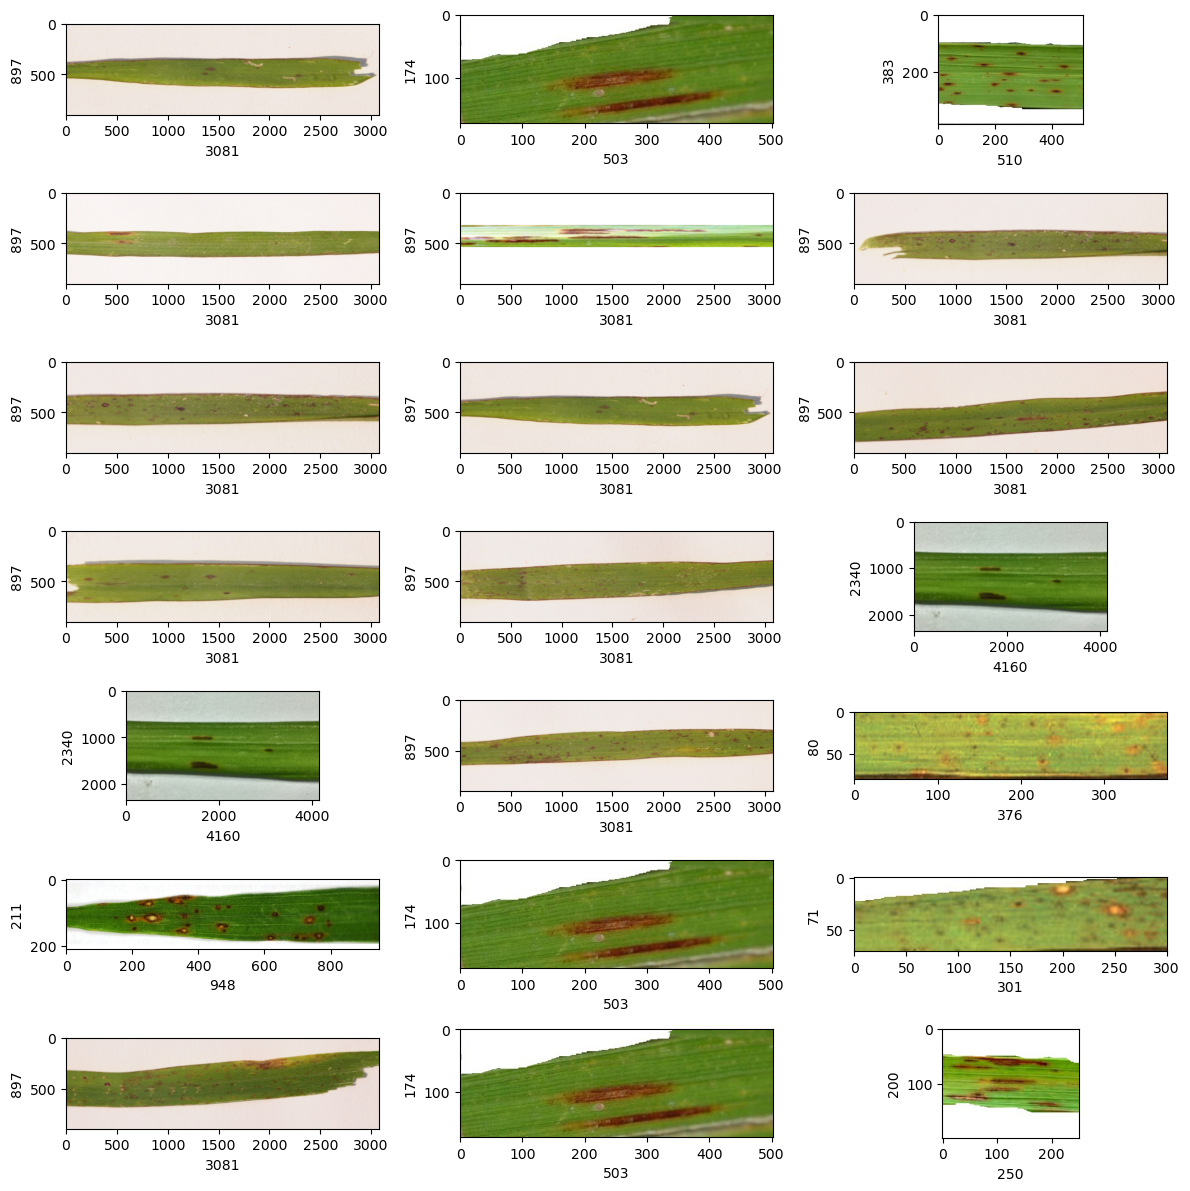

In [5]:
plt.figure(figsize=(12,12))
path = r"C:\Users\vilas\RICE_LEAF_DATA\rice_leaf_diseases_dataset\Leaf Smut"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Data Preprocessing

In [6]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = .25)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .25)

### Example of Data Augumentation

In [7]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(r"C:\Users\vilas\RICE_LEAF_DATA\rice_leaf_diseases_dataset\Brown spot\DSC_0121.jpg")  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"C:\Users\vilas\RICE_LEAF_DATA\Image_Augmentation_Examples", save_prefix='rice_leaf_brown_spot', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

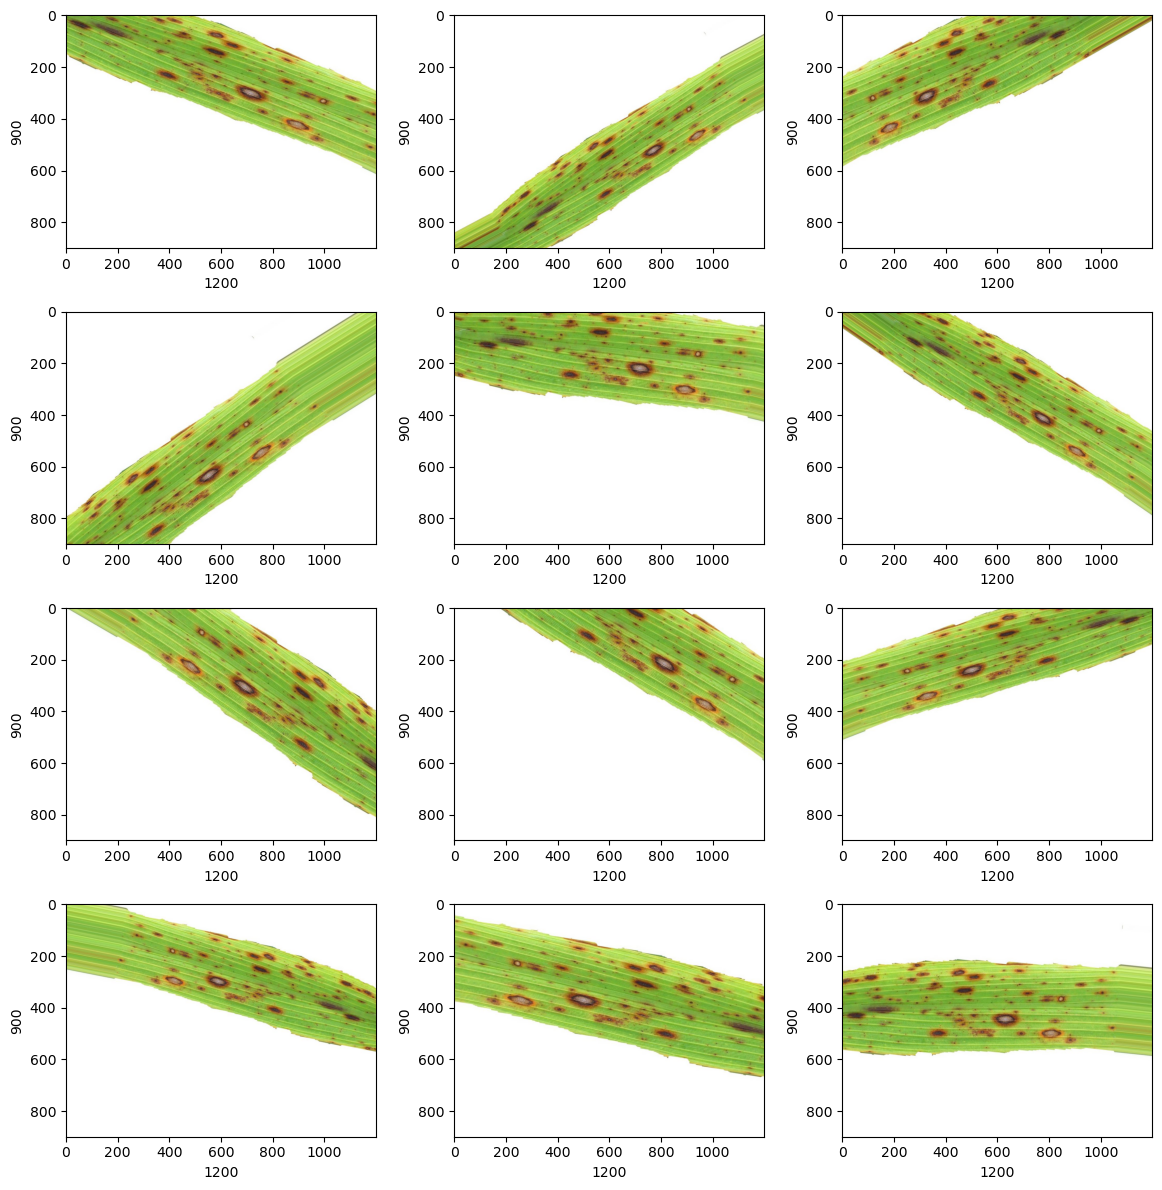

In [8]:
plt.figure(figsize=(12,12))
path = r"C:\Users\vilas\RICE_LEAF_DATA\Image_Augmentation_Examples"
for i in range(1,13):
    plt.subplot(4,3,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### Generating a Training and Validation Set

In [9]:
training_set = train_datagen.flow_from_directory(r"C:\Users\vilas\RICE_LEAF_DATA\rice_leaf_diseases_dataset",
                                       target_size=(256, 256),
                                                 batch_size=5,
                                     class_mode='categorical',
                                            subset='training')

validation_set = test_datagen.flow_from_directory(r"C:\Users\vilas\RICE_LEAF_DATA\rice_leaf_diseases_dataset",
                                        target_size=(256, 256),
                                                 batch_size=5,
                                      class_mode='categorical',
                                               shuffle = False,
                                           subset='validation')

Found 90 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


## Building the Convolution Neural Network Model

In [10]:
#Initialising the CNN model
model_adam = Sequential()
# First Convolution Layer
model_adam.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_adam.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Flattening
model_adam.add(Flatten())

# Fully Connected Layer
model_adam.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adam.add(Dropout(0.5))

# Output Layer
model_adam.add(Dense(3, activation="softmax"))

### Summary of the Model

In [11]:
model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0

## Training the CNN Model

### Compiling the CNN Model

In [12]:
model_adam.compile(loss = 'categorical_crossentropy',  optimizer = 'adam', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
# Training the model
history_adam = model_adam.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
18/18 [==============================] - 5s 233ms/step - loss: 1.1247 - accuracy: 0.3000 - val_loss: 1.0935 - val_accuracy: 0.3333
Epoch 2/100
18/18 [==============================] - 4s 214ms/step - loss: 1.1003 - accuracy: 0.3111 - val_loss: 1.0876 - val_accuracy: 0.5333
Epoch 3/100
18/18 [==============================] - 4s 219ms/step - loss: 1.0994 - accuracy: 0.3111 - val_loss: 1.0866 - val_accuracy: 0.4667
Epoch 4/100
18/18 [==============================] - 4s 214ms/step - loss: 1.0955 - accuracy: 0.4000 - val_loss: 1.0277 - val_accuracy: 0.4000
Epoch 5/100
18/18 [==============================] - 4s 213ms/step - loss: 1.0972 - accuracy: 0.4111 - val_loss: 1.0528 - val_accuracy: 0.5000
Epoch 6/100
18/18 [==============================] - 4s 215ms/step - loss: 1.1205 - accuracy: 0.4556 - val_loss: 0.9799 - val_accuracy: 0.3333
Epoch 7/100
18/18 [==============================] - 4s 218ms/step - loss: 1.0905 - accuracy: 0.3333 - val_loss: 1.0838 - val_accuracy: 0.6333

Epoch 58/100
18/18 [==============================] - 4s 221ms/step - loss: 0.5104 - accuracy: 0.7667 - val_loss: 6.5738 - val_accuracy: 0.7667
Epoch 59/100
18/18 [==============================] - 4s 214ms/step - loss: 0.4467 - accuracy: 0.7667 - val_loss: 4.9707 - val_accuracy: 0.6667
Epoch 60/100
18/18 [==============================] - 4s 222ms/step - loss: 0.5023 - accuracy: 0.7333 - val_loss: 3.2292 - val_accuracy: 0.5667
Epoch 61/100
18/18 [==============================] - 4s 232ms/step - loss: 0.4851 - accuracy: 0.7778 - val_loss: 4.4971 - val_accuracy: 0.7667
Epoch 62/100
18/18 [==============================] - 4s 222ms/step - loss: 0.5367 - accuracy: 0.7667 - val_loss: 5.5537 - val_accuracy: 0.6333
Epoch 63/100
18/18 [==============================] - 4s 218ms/step - loss: 0.5946 - accuracy: 0.7778 - val_loss: 1.4128 - val_accuracy: 0.6333
Epoch 64/100
18/18 [==============================] - 4s 226ms/step - loss: 0.5397 - accuracy: 0.7333 - val_loss: 2.3566 - val_accuracy:

In [14]:
score_adam = model_adam.evaluate(validation_set,verbose=0)
accuracy_adam = 100*score_adam[1]
print('Accuracy CNN Model with Adam Optimizer:',accuracy_adam)

Accuracy CNN Model with Adam Optimizer: 43.33333373069763


In [15]:
history_adam.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

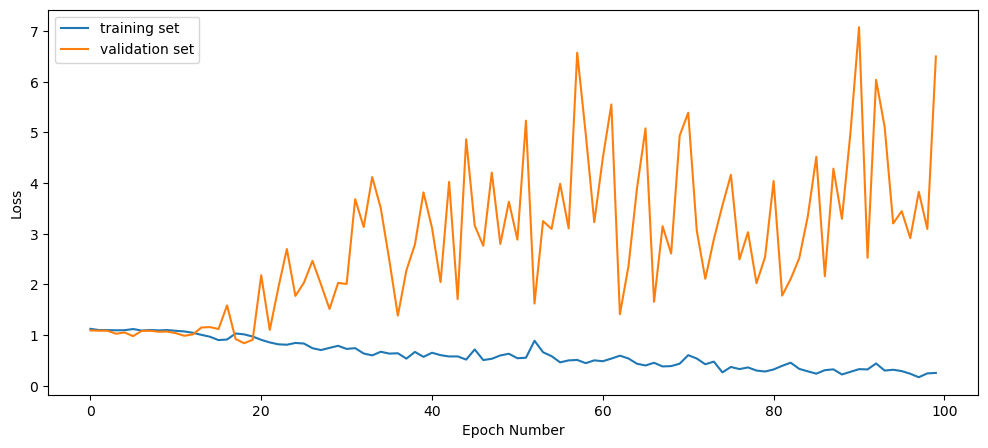

In [16]:
plt.figure(figsize=(12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history_adam.history['loss'], label = 'training set')
plt.plot(history_adam.history['val_loss'], label = 'validation set')
plt.legend()

## Using RMSProp as Optimizer

In [17]:
#Initialising the CNN model
model_rms = Sequential()
# First Convolution Layer
model_rms.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_rms.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_rms.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_rms.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Flattening
model_rms.add(Flatten())
# Fully Connected Layer
model_rms.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_rms.add(Dropout(0.5))

# Output Layer
model_rms.add(Dense(3, activation="softmax"))

In [18]:
model_rms.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)      

### Compiling the Model

In [19]:
from keras.optimizers import RMSprop
model_rms.compile(loss = 'categorical_crossentropy',  optimizer = 'RMSprop', metrics=['accuracy'])

In [20]:
# Training the model
history_rms = model_rms.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
18/18 [==============================] - 5s 234ms/step - loss: 1.3295 - accuracy: 0.3222 - val_loss: 1.0989 - val_accuracy: 0.2333
Epoch 2/100
18/18 [==============================] - 4s 223ms/step - loss: 1.1102 - accuracy: 0.3000 - val_loss: 1.0840 - val_accuracy: 0.6000
Epoch 3/100
18/18 [==============================] - 4s 215ms/step - loss: 1.1004 - accuracy: 0.4111 - val_loss: 1.0948 - val_accuracy: 0.4667
Epoch 4/100
18/18 [==============================] - 4s 220ms/step - loss: 1.1453 - accuracy: 0.2556 - val_loss: 1.0898 - val_accuracy: 0.3333
Epoch 5/100
18/18 [==============================] - 4s 225ms/step - loss: 1.1100 - accuracy: 0.3222 - val_loss: 1.0895 - val_accuracy: 0.5000
Epoch 6/100
18/18 [==============================] - 4s 243ms/step - loss: 1.1035 - accuracy: 0.3333 - val_loss: 1.0809 - val_accuracy: 0.5667
Epoch 7/100
18/18 [==============================] - 4s 234ms/step - loss: 1.1074 - accuracy: 0.4667 - val_loss: 1.1484 - val_accuracy: 0.3333

Epoch 58/100
18/18 [==============================] - 4s 221ms/step - loss: 0.4785 - accuracy: 0.8111 - val_loss: 2.0014 - val_accuracy: 0.8000
Epoch 59/100
18/18 [==============================] - 4s 217ms/step - loss: 0.5271 - accuracy: 0.7889 - val_loss: 1.9899 - val_accuracy: 0.8333
Epoch 60/100
18/18 [==============================] - 4s 221ms/step - loss: 0.5313 - accuracy: 0.7778 - val_loss: 2.2400 - val_accuracy: 0.7333
Epoch 61/100
18/18 [==============================] - 4s 221ms/step - loss: 0.5170 - accuracy: 0.7889 - val_loss: 1.9673 - val_accuracy: 0.7333
Epoch 62/100
18/18 [==============================] - 4s 215ms/step - loss: 0.3346 - accuracy: 0.8556 - val_loss: 1.9983 - val_accuracy: 0.8333
Epoch 63/100
18/18 [==============================] - 4s 222ms/step - loss: 0.5211 - accuracy: 0.7778 - val_loss: 2.4130 - val_accuracy: 0.7667
Epoch 64/100
18/18 [==============================] - 4s 215ms/step - loss: 0.4210 - accuracy: 0.8000 - val_loss: 1.7733 - val_accuracy:

In [21]:
score_rms = model_rms.evaluate(validation_set,verbose=0)
accuracy_rms = 100*score_rms[1]
print('Accuracy CNN Model with RMSprop Optimizer:',accuracy_rms)

Accuracy CNN Model with RMSprop Optimizer: 66.66666865348816


In [22]:
history_rms.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

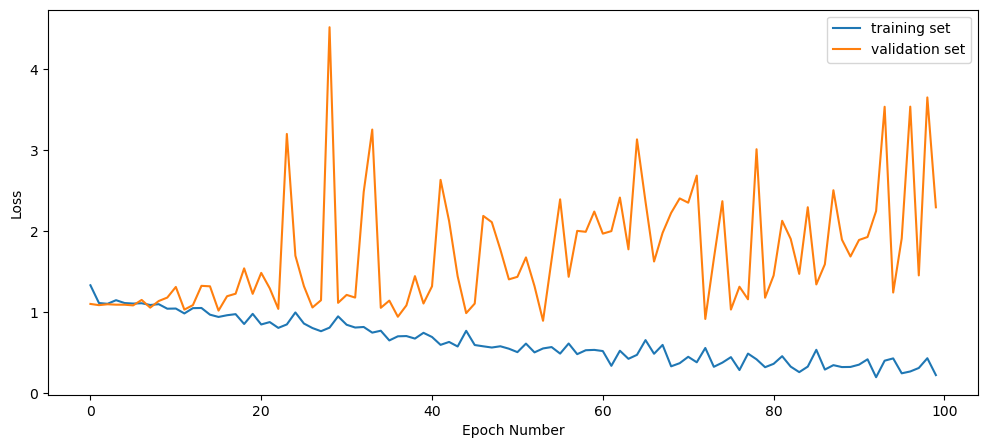

In [23]:
plt.figure(figsize=(12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history_rms.history['loss'], label = 'training set')
plt.plot(history_rms.history['val_loss'], label = 'validation set')
plt.legend()

## Using SGD as Optimizer

In [32]:
#Initialising the CNN model
model_sgd = Sequential()
# First Convolution Layer
model_sgd.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_sgd.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_sgd.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_sgd.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Flattening
model_sgd.add(Flatten())
# Fully Connected Layer
model_sgd.add(Dense(128, activation="relu"))

# Output Layer
model_sgd.add(Dense(3, activation="softmax"))

In [33]:
model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 32)      

### Compiling the Model with SGD Optimizer

In [34]:
from keras.optimizers import SGD
model_sgd.compile(loss = 'categorical_crossentropy',  optimizer = "sgd", metrics=['accuracy'])

In [35]:
# Training the model
history_sgd = model_sgd.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
18/18 [==============================] - 4s 221ms/step - loss: 1.1248 - accuracy: 0.2667 - val_loss: 1.0995 - val_accuracy: 0.2667
Epoch 2/100
18/18 [==============================] - 4s 211ms/step - loss: 1.1068 - accuracy: 0.3444 - val_loss: 1.1010 - val_accuracy: 0.4000
Epoch 3/100
18/18 [==============================] - 4s 208ms/step - loss: 1.1016 - accuracy: 0.2778 - val_loss: 1.1027 - val_accuracy: 0.3333
Epoch 4/100
18/18 [==============================] - 4s 205ms/step - loss: 1.1031 - accuracy: 0.4111 - val_loss: 1.1041 - val_accuracy: 0.3333
Epoch 5/100
18/18 [==============================] - 4s 208ms/step - loss: 1.1015 - accuracy: 0.3333 - val_loss: 1.1000 - val_accuracy: 0.3000
Epoch 6/100
18/18 [==============================] - 4s 210ms/step - loss: 1.0983 - accuracy: 0.3667 - val_loss: 1.1005 - val_accuracy: 0.3000
Epoch 7/100
18/18 [==============================] - 4s 209ms/step - loss: 1.1015 - accuracy: 0.3333 - val_loss: 1.0999 - val_accuracy: 0.3333

Epoch 58/100
18/18 [==============================] - 4s 210ms/step - loss: 0.9830 - accuracy: 0.4778 - val_loss: 1.0144 - val_accuracy: 0.5333
Epoch 59/100
18/18 [==============================] - 4s 218ms/step - loss: 0.9854 - accuracy: 0.5111 - val_loss: 0.9893 - val_accuracy: 0.5333
Epoch 60/100
18/18 [==============================] - 4s 227ms/step - loss: 0.9196 - accuracy: 0.5000 - val_loss: 0.9700 - val_accuracy: 0.6000
Epoch 61/100
18/18 [==============================] - 4s 218ms/step - loss: 0.9224 - accuracy: 0.5333 - val_loss: 0.9930 - val_accuracy: 0.4667
Epoch 62/100
18/18 [==============================] - 4s 215ms/step - loss: 0.8754 - accuracy: 0.5778 - val_loss: 0.9577 - val_accuracy: 0.7333
Epoch 63/100
18/18 [==============================] - 4s 214ms/step - loss: 0.9808 - accuracy: 0.5667 - val_loss: 0.9584 - val_accuracy: 0.5333
Epoch 64/100
18/18 [==============================] - 4s 215ms/step - loss: 0.9243 - accuracy: 0.5667 - val_loss: 0.9168 - val_accuracy:

In [36]:
score_sgd = model_sgd.evaluate(validation_set,verbose=0)
accuracy_sgd = 100*score_sgd[1]
print('Accuracy CNN Model with RMSprop Optimizer',accuracy_sgd)

Accuracy CNN Model with RMSprop Optimizer 40.00000059604645


In [37]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

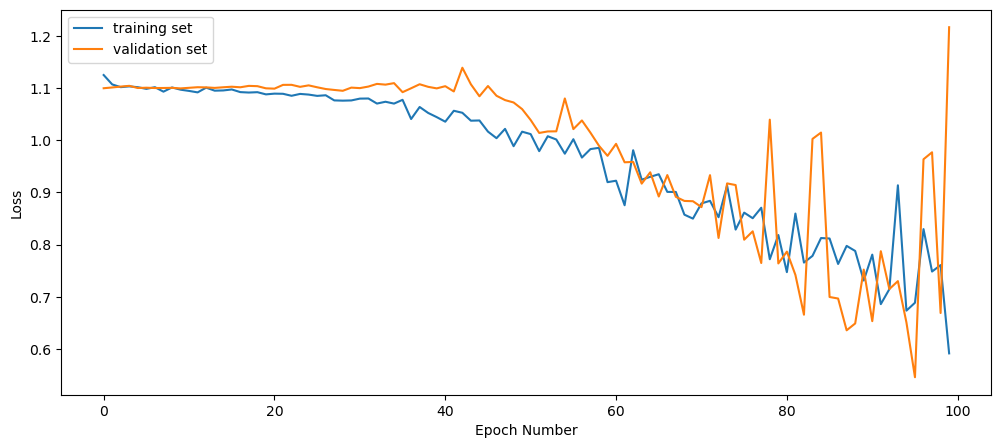

In [38]:
plt.figure(figsize=(12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history_sgd.history['loss'], label = 'training set')
plt.plot(history_sgd.history['val_loss'], label = 'validation set')
plt.legend()